## Plot results

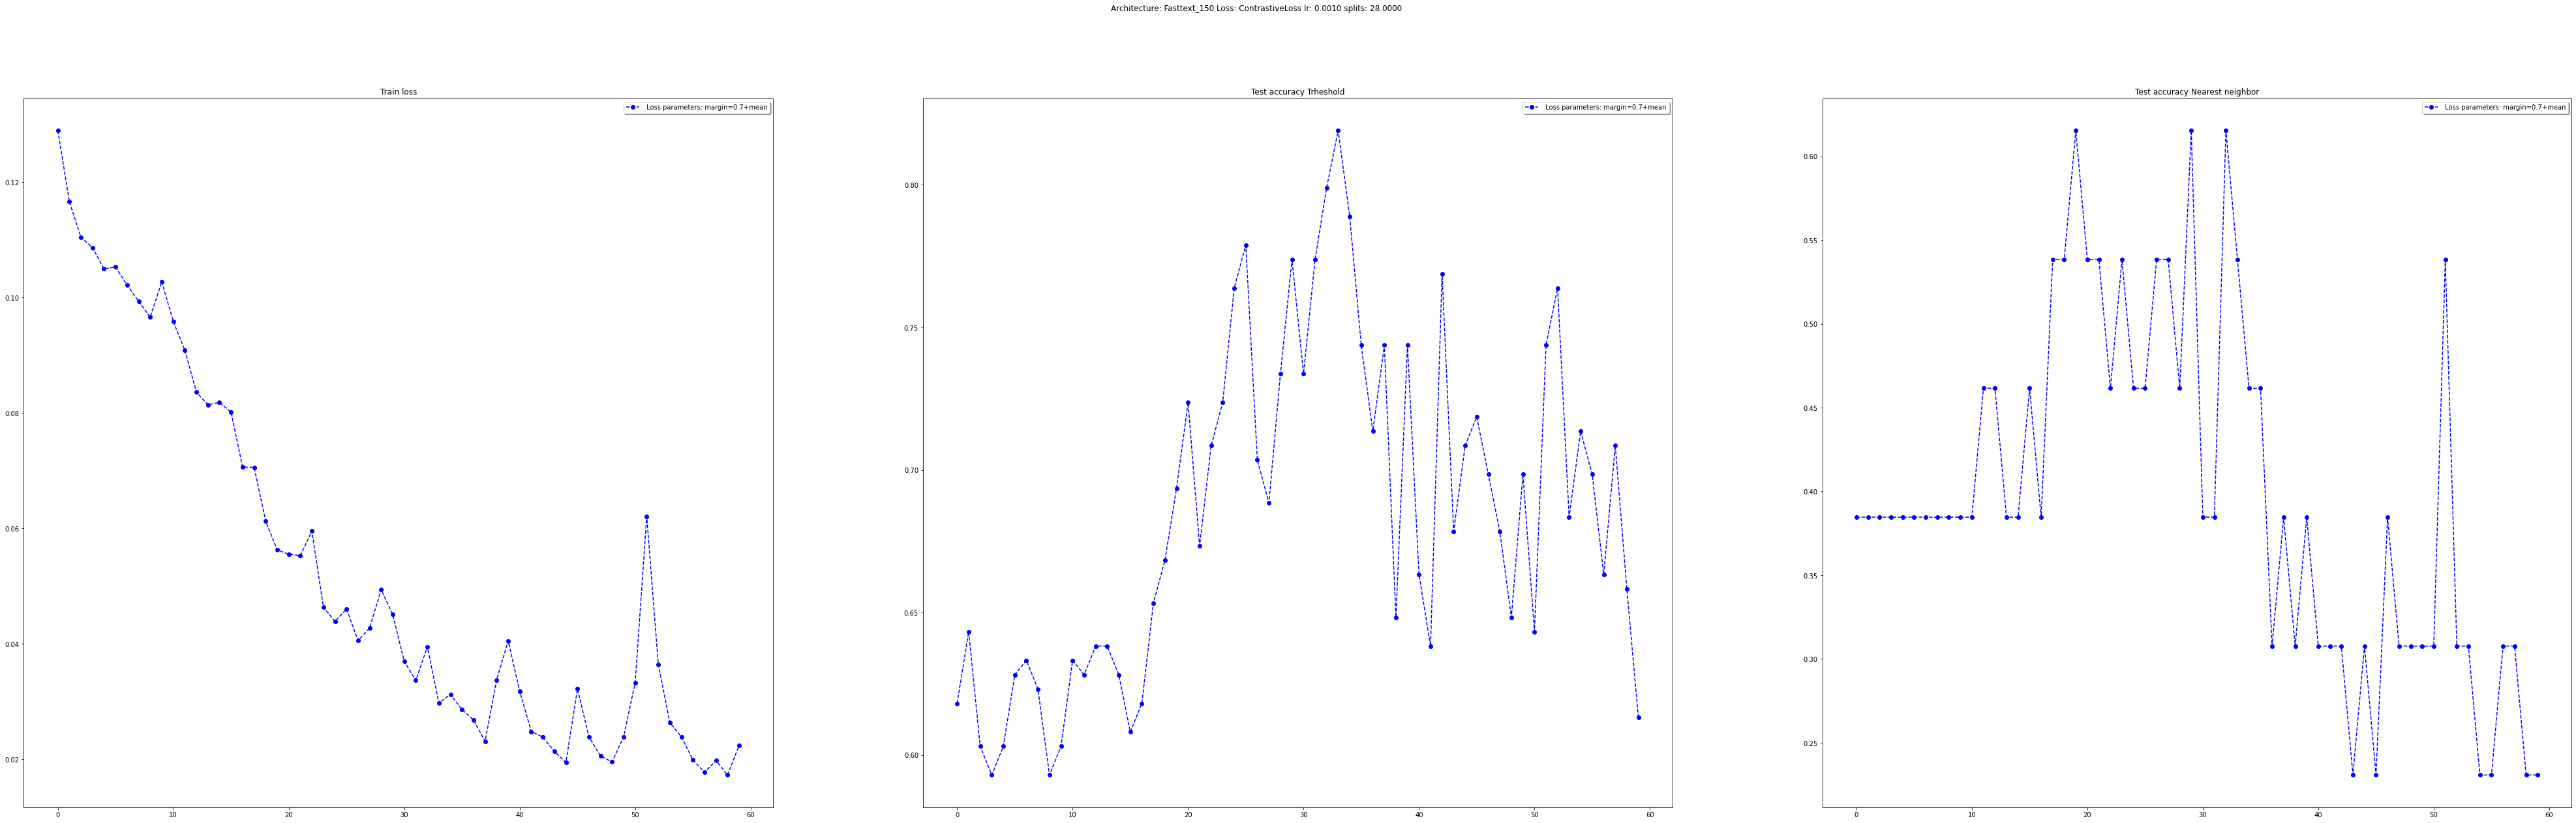

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def reading(file_path):
    s = open(file_path, 'r').read()
    return eval(s)

loss_functions = ["CosineEmbeddingLoss","ContrastiveLoss"]
loss_parameters = ["1.0+mean","0.0+mean","0.7+mean","0.7+sum","0.3+mean","0.5+mean"]
colors = ["red","green","blue","darkblue","orange","black"]
learning_rates = ["0.0010","0.0007","0.0100"]
splits = ["28.0000","14.0000"]
archi = ["Fasttext_300","Fasttext_150"]
strategy = ["isolation","random"]
sampling = 2
path = "./results/"
for lf in loss_functions:
    for a in archi:
        for s in splits:
            for lr in learning_rates:
                content = False
                for lp in range(len(loss_parameters)):                    
                    #{'epoch': 0, 'loss': 0.07563, 'acc': 0.54412, 'acc2': 0.36527, 'time_epoch': 268.2493, 'time_total': 268.2493}    
                    file_name = "net_name:"+a+"|batch_splits:"+s+"|lr:"+lr+"|loss_name:"+lf+"|loss_parameters:"+loss_parameters[lp]
                    try:
                        df_results0 = reading(path+file_name+".txt")
                    except:
                        continue
                    content = True
                    break
                    
                if not content:
                    continue
                    
                fig1, axs = plt.subplots(1, 3, figsize=(70, 20), facecolor='w', edgecolor='k')
                for lp in range(len(loss_parameters)):                    
                    file_name = "net_name:"+a+"|batch_splits:"+s+"|lr:"+lr+"|loss_name:"+lf+"|loss_parameters:"+loss_parameters[lp]
                    #{'epoch': 0, 'loss': 0.07563, 'acc': 0.54412, 'acc2': 0.36527, 'time_epoch': 268.2493, 'time_total': 268.2493}    
                    try:
                        df_results0 = reading(path+file_name+".txt")
                    except:
                        continue
                    loss = list(x["loss"] for x in df_results0)
                    acc = list(x["acc"] for x in df_results0)
                    acc2 = list(x["acc2"] for x in df_results0)

                    fig1.suptitle("Architecture: "+ a+ " Loss: "+lf+" lr: "+lr+" splits: "+s)
                    axs[0].plot(range(0,len(df_results0)), loss, marker="o", c=colors[lp],  linestyle='--', label=" Loss parameters: margin="+loss_parameters[lp])
                    axs[1].plot(range(0,len(df_results0)), acc, marker="o", c=colors[lp],  linestyle='--', label=" Loss parameters: margin="+loss_parameters[lp])
                    axs[2].plot(range(0,len(df_results0)), acc2, marker="o", c=colors[lp],  linestyle='--', label=" Loss parameters: margin="+loss_parameters[lp])

                    axs[0].set_title("Train loss")
                    axs[1].set_title("Test accuracy Trheshold")
                    axs[2].set_title("Test accuracy Nearest neighbor")

                    leg = axs[0].legend(loc='best', ncol=1, shadow=True, fancybox=True)
                    leg = axs[1].legend(loc='best', ncol=1, shadow=True, fancybox=True)
                    leg = axs[2].legend(loc='best', ncol=1, shadow=True, fancybox=True)
                
                fig1.savefig(path+"net_name:"+a+"|batch_splits:"+s+"|lr:"+lr+"|loss_name:"+lf+".png",pad_inches = 0)